QISKIT IMPLEMENTATION TO FIND SECRET BITSTRING

In [1]:
#Importing Qiskit and plot histogram
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
b='1101'
n = len(b)

Step 1 : Create two n-qubit quantum registers initialised to zero state

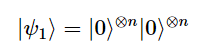              

In [3]:
simon_circuit = QuantumCircuit(n*2, n)
simon_circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     
q_7: 
     
c: 4/

Step 2 : Apply Hadamard transform to first register

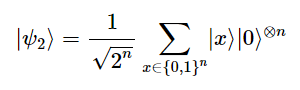

In [4]:
simon_circuit.h(range(n))  
simon_circuit.barrier()
simon_circuit.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     ├───┤ ░ 
q_3: ┤ H ├─░─
     └───┘ ░ 
q_4: ──────░─
           ░ 
q_5: ──────░─
           ░ 
q_6: ──────░─
           ░ 
q_7: ──────░─
           ░ 
c: 4/════════

Step 3 : Apply Query Function<br>
<br>
It involves three steps

1.Create a copy of first register

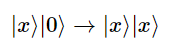

In [5]:
for i in range(n):
    simon_circuit.cx(i,n+i)
simon_circuit.draw()

┌───┐ ░                     
q_0: ┤ H ├─░───■─────────────────
     ├───┤ ░   │                 
q_1: ┤ H ├─░───┼────■────────────
     ├───┤ ░   │    │            
q_2: ┤ H ├─░───┼────┼────■───────
     ├───┤ ░   │    │    │       
q_3: ┤ H ├─░───┼────┼────┼────■──
     └───┘ ░ ┌─┴─┐  │    │    │  
q_4: ──────░─┤ X ├──┼────┼────┼──
           ░ └───┘┌─┴─┐  │    │  
q_5: ──────░──────┤ X ├──┼────┼──
           ░      └───┘┌─┴─┐  │  
q_6: ──────░───────────┤ X ├──┼──
           ░           └───┘┌─┴─┐
q_7: ──────░────────────────┤ X ├
           ░                └───┘
c: 4/════════════════════════════

2. Create one-to-one or two-to-one mapping
<br>cx gate acts as XOR gate
<br>One of the ways to do it is 
<ul>
<li>choose an index j such that b[j]=1 and use that qubit as control qubit
<li>For mapping find every k such that b[k]=1 then apply CX gate to that qubit in second register
<li>incase no such j exists no XOR operations are performed
<\ul>

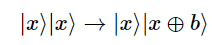

In [6]:
j=-1
for i in range(n) :
    if b[i]=='1' :
        j=n-i-1
        break

for i in range(n) :
    if b[i] == '1' :
        simon_circuit.cx(j,2*n-1-i)
simon_circuit.draw()

┌───┐ ░                                    
q_0: ┤ H ├─░───■────────────────────────────────
     ├───┤ ░   │                                
q_1: ┤ H ├─░───┼────■───────────────────────────
     ├───┤ ░   │    │                           
q_2: ┤ H ├─░───┼────┼────■──────────────────────
     ├───┤ ░   │    │    │                      
q_3: ┤ H ├─░───┼────┼────┼────■────■────■────■──
     └───┘ ░ ┌─┴─┐  │    │    │    │    │  ┌─┴─┐
q_4: ──────░─┤ X ├──┼────┼────┼────┼────┼──┤ X ├
           ░ └───┘┌─┴─┐  │    │    │    │  └───┘
q_5: ──────░──────┤ X ├──┼────┼────┼────┼───────
           ░      └───┘┌─┴─┐  │    │  ┌─┴─┐     
q_6: ──────░───────────┤ X ├──┼────┼──┤ X ├─────
           ░           └───┘┌─┴─┐┌─┴─┐└───┘     
q_7: ──────░────────────────┤ X ├┤ X ├──────────
           ░                └───┘└───┘          
c: 4/═══════════════════════════════════════════

3. Randomly permutate and flip the qubits on second register<br>
<br>
Any mapping of input to output satisfying the hidden string condition can be simplified to above steps for a particular third step and 3rd part doesnt affect the results as they represent outputs which have no relation to hidden string 'b'

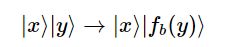

In [7]:
import random

def rand_key(p):
    key1 = ""
    for i in range(p):
        temp = str(random.randint(0, 1))
        key1 += temp    
    return(key1)

In [8]:
inp=rand_key(n)
simon_circuit.barrier()
for i in range(n) :
        if inp[i]=='1' :
            simon_circuit.x(2*n-i-1)

simon_circuit.draw()

┌───┐ ░                                     ░      
q_0: ┤ H ├─░───■─────────────────────────────────░──────
     ├───┤ ░   │                                 ░      
q_1: ┤ H ├─░───┼────■────────────────────────────░──────
     ├───┤ ░   │    │                            ░      
q_2: ┤ H ├─░───┼────┼────■───────────────────────░──────
     ├───┤ ░   │    │    │                       ░      
q_3: ┤ H ├─░───┼────┼────┼────■────■────■────■───░──────
     └───┘ ░ ┌─┴─┐  │    │    │    │    │  ┌─┴─┐ ░      
q_4: ──────░─┤ X ├──┼────┼────┼────┼────┼──┤ X ├─░──────
           ░ └───┘┌─┴─┐  │    │    │    │  └───┘ ░      
q_5: ──────░──────┤ X ├──┼────┼────┼────┼────────░──────
           ░      └───┘┌─┴─┐  │    │  ┌─┴─┐      ░ ┌───┐
q_6: ──────░───────────┤ X ├──┼────┼──┤ X ├──────░─┤ X ├
           ░           └───┘┌─┴─┐┌─┴─┐└───┘      ░ ├───┤
q_7: ──────░────────────────┤ X ├┤ X ├───────────░─┤ X ├
           ░                └───┘└───┘           ░ └───┘
c: 4/═══════════════════════════════════════════════════

Step 4 : Measure second register (but we have no use of answer so we will be storing them in n classical bits then overwriting later)<br>
Measuring creates a single f(x) thus we would have below as first register

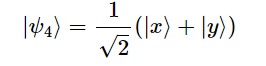

In [9]:
simon_circuit.barrier()
simon_circuit.measure(range(n,2*n), range(n))
simon_circuit.barrier()
simon_circuit.draw()

┌───┐ ░                                     ░       ░              ░ 
q_0: ┤ H ├─░───■─────────────────────────────────░───────░──────────────░─
     ├───┤ ░   │                                 ░       ░              ░ 
q_1: ┤ H ├─░───┼────■────────────────────────────░───────░──────────────░─
     ├───┤ ░   │    │                            ░       ░              ░ 
q_2: ┤ H ├─░───┼────┼────■───────────────────────░───────░──────────────░─
     ├───┤ ░   │    │    │                       ░       ░              ░ 
q_3: ┤ H ├─░───┼────┼────┼────■────■────■────■───░───────░──────────────░─
     └───┘ ░ ┌─┴─┐  │    │    │    │    │  ┌─┴─┐ ░       ░ ┌─┐          ░ 
q_4: ──────░─┤ X ├──┼────┼────┼────┼────┼──┤ X ├─░───────░─┤M├──────────░─
           ░ └───┘┌─┴─┐  │    │    │    │  └───┘ ░       ░ └╥┘┌─┐       ░ 
q_5: ──────░──────┤ X ├──┼────┼────┼────┼────────░───────░──╫─┤M├───────░─
           ░      └───┘┌─┴─┐  │    │  ┌─┴─┐      ░ ┌───┐ ░  ║ └╥┘┌─┐    ░ 
q_6: ──────░───────────┤ X ├──┼────┼──┤ X ├──────░─┤ X ├─░──╫──╫─┤M├────░─
           ░           └───┘┌─┴─┐┌─┴─┐└───┘      ░ ├───┤ ░  ║  ║ └╥┘┌─┐ ░ 
q_7: ──────░────────────────┤ X ├┤ X ├───────────░─┤ X ├─░──╫──╫──╫─┤M├─░─
           ░                └───┘└───┘           ░ └───┘ ░  ║  ║  ║ └╥┘ ░ 
c: 4/═══════════════════════════════════════════════════════╩══╩══╩══╩════
                                                            0  1  2  3

Step 5 : Apply Hadamard to first register (we wont have any use of second register from here)

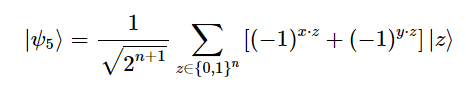

Which can be expanded as (normalising factor is ignored to see it simply but final state multiply it with 1/&radic;2^n+1

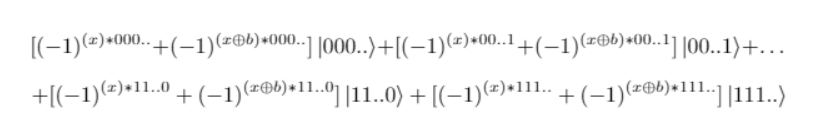

Step 6 : Measure first register
<br>We will get a string z as output and 

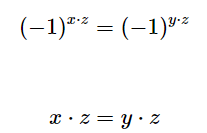

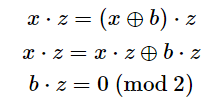

In [10]:
simon_circuit.h(range(n))
simon_circuit.measure(range(n),range(n))
simon_circuit.draw()

┌───┐ ░                                     ░       ░              ░ ┌───┐»
q_0: ┤ H ├─░───■─────────────────────────────────░───────░──────────────░─┤ H ├»
     ├───┤ ░   │                                 ░       ░              ░ ├───┤»
q_1: ┤ H ├─░───┼────■────────────────────────────░───────░──────────────░─┤ H ├»
     ├───┤ ░   │    │                            ░       ░              ░ ├───┤»
q_2: ┤ H ├─░───┼────┼────■───────────────────────░───────░──────────────░─┤ H ├»
     ├───┤ ░   │    │    │                       ░       ░              ░ ├───┤»
q_3: ┤ H ├─░───┼────┼────┼────■────■────■────■───░───────░──────────────░─┤ H ├»
     └───┘ ░ ┌─┴─┐  │    │    │    │    │  ┌─┴─┐ ░       ░ ┌─┐          ░ └───┘»
q_4: ──────░─┤ X ├──┼────┼────┼────┼────┼──┤ X ├─░───────░─┤M├──────────░──────»
           ░ └───┘┌─┴─┐  │    │    │    │  └───┘ ░       ░ └╥┘┌─┐       ░      »
q_5: ──────░──────┤ X ├──┼────┼────┼────┼────────░───────░──╫─┤M├───────░──────»
           ░      └───┘┌─┴─┐  │    │  ┌─┴─┐      ░ ┌───┐ ░  ║ └╥┘┌─┐    ░      »
q_6: ──────░───────────┤ X ├──┼────┼──┤ X ├──────░─┤ X ├─░──╫──╫─┤M├────░──────»
           ░           └───┘┌─┴─┐┌─┴─┐└───┘      ░ ├───┤ ░  ║  ║ └╥┘┌─┐ ░      »
q_7: ──────░────────────────┤ X ├┤ X ├───────────░─┤ X ├─░──╫──╫──╫─┤M├─░──────»
           ░                └───┘└───┘           ░ └───┘ ░  ║  ║  ║ └╥┘ ░      »
c: 4/═══════════════════════════════════════════════════════╩══╩══╩══╩═════════»
                                                            0  1  2  3         »
«     ┌─┐         
«q_0: ┤M├─────────
«     └╥┘┌─┐      
«q_1: ─╫─┤M├──────
«      ║ └╥┘┌─┐   
«q_2: ─╫──╫─┤M├───
«      ║  ║ └╥┘┌─┐
«q_3: ─╫──╫──╫─┤M├
«      ║  ║  ║ └╥┘
«q_4: ─╫──╫──╫──╫─
«      ║  ║  ║  ║ 
«q_5: ─╫──╫──╫──╫─
«      ║  ║  ║  ║ 
«q_6: ─╫──╫──╫──╫─
«      ║  ║  ║  ║ 
«q_7: ─╫──╫──╫──╫─
«      ║  ║  ║  ║ 
«c: 4/═╩══╩══╩══╩═
«      0  1  2  3

A string z will be measured, whose inner product with  b=0. But a z value can have multiple b values. Thus, repeating the algorithm  ≈n times, we will be able to obtain n different values of z and the following system of equation can be written:

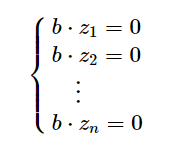

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(counts)

{'1100': 136, '0000': 142, '0111': 124, '1110': 137, '0101': 137, '1011': 119, '0010': 113, '1001': 116}


If function is one-to-one histogram would be uniform and containing all states whereas two-to-one would not be uniform and would have half number of states with same probability rest have would have zero probability

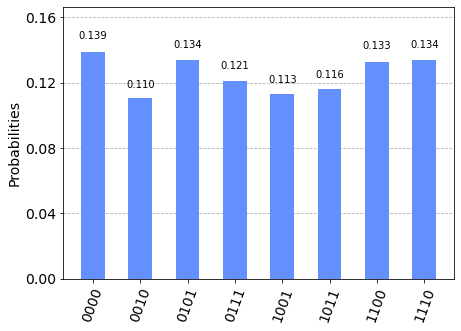

In [12]:
plot_histogram(counts)

let the secret binary string b be b1,b2,b3,b4  <br>
Lets assume we measure 0010 in first turn so   <br>
 Therefore  <br> 
 <font size="+1">(b1.0)+(b2.0)+(b3.1)+(b4.0)=0</font><br>
    hence <br>
    <font size="+1">b3=0</font>


taking z=0101
we get either <br>
<font size="+1">b2=0 and b4=0 or
b2=1 and b4=1</font>

similarlt taking z=1100
we get either <br>
<font size="+1">b1=0 and b2=0 or
b1=1 and b2=1</font><br>
and taking z=1001
we get either <br>
<font size="+1">b1=0 and b4=0 or
b1=1 and b4=1</font>

(We can solve 4 equations in any way like gaussian elimination)

From above four solutions we get that b is either '0000' or '1101' 
Since '0000' is a trivial solution we get '1101' as secret string
if there exist no other solution '0000' is the secret bitsring

We can verify if the z satisfy the secret bit string b

In [13]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2 )

print('b = ' + b)
for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

b = 1101
1101.1100 = 0 (mod 2)
1101.0000 = 0 (mod 2)
1101.0111 = 0 (mod 2)
1101.1110 = 0 (mod 2)
1101.0101 = 0 (mod 2)
1101.1011 = 0 (mod 2)
1101.0010 = 0 (mod 2)
1101.1001 = 0 (mod 2)
